# Customer Segmentation using KMeans Clustering

## Imports

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Dataset Glossary

This dataset is designed for learning customer segmentation concepts, such as market basket analysis. It includes basic customer data such as Customer ID, age, gender, annual income, and spending score, which is assigned based on customer behavior and purchasing data. The goal is to help a supermarket mall owner understand their customers better, identify target customers who are likely to converge, and provide insights to the marketing team for strategic planning.

## Load the data

In [70]:
df = pd.read_csv('../../datasets/customers.csv')
df.isna().sum()
df.head(11)


,Customer ID,Age,Gender,Annual Income,Spending Score
0,d410ea53-6661-42a9-ad3a-f554b05fd2a7,30,Male,151479,89
1,1770b26f-493f-46b6-837f-4237fb5a314e,58,Female,185088,95
2,e81aa8eb-1767-4b77-87ce-1620dc732c5e,62,Female,70912,76
3,9795712a-ad19-47bf-8886-4f997d6046e3,23,Male,55460,57
4,64139426-2226-4cd6-bf09-91bce4b4db5e,24,Male,153752,76
5,7e211337-e92f-4140-8231-5c9ac7a2aa12,42,Male,158335,40
6,30661d57-eeb5-4886-970a-9c7d0f260ad8,27,Female,163501,37
7,43417ade-6b17-431e-ae76-d8ed26aa46ac,24,Male,70476,17
8,86f73b1a-6a91-4d7e-ad21-0aefcf6111cc,83,Male,47743,34
9,b20fe0a0-e254-4116-b804-5403bb2f59ea,62,Female,63448,3


In [71]:
df.describe()
df.drop(['Customer ID'], axis=1, inplace=True)


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15079 entries, 0 to 15078
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             15079 non-null  int64 
 1   Gender          15079 non-null  object
 2   Annual Income   15079 non-null  int64 
 3   Spending Score  15079 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 471.3+ KB


In [73]:
gender_map = {'Male': 1, 'Female': 2}
df['Gender'] = df['Gender'].map(gender_map)

df.head()

,Age,Gender,Annual Income,Spending Score
0,30,1,151479,89
1,58,2,185088,95
2,62,2,70912,76
3,23,1,55460,57
4,24,1,153752,76


Text(0.5, 1.0, 'Correlation Heatmap')

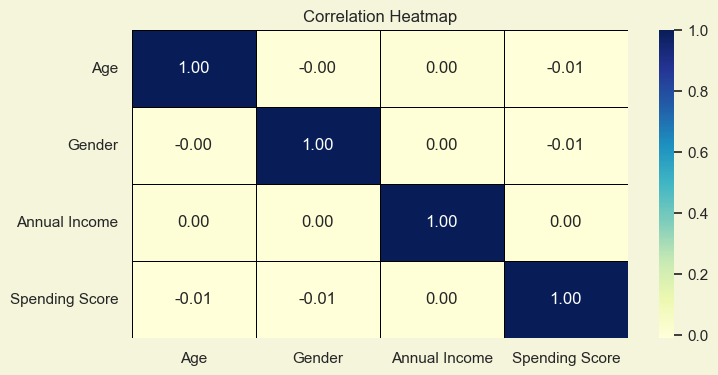

In [179]:
plt.figure(figsize=(8, 4), facecolor='beige')
# sns.heatmap(df.corr(), annot=True,  cmap=sns.dark_palette("#00eaff", as_cmap=True))
sns.heatmap(df.corr(), annot=True, linewidth=0.5,  fmt=".2f",  cmap="YlGnBu", linecolor="black")
plt.title("Correlation Heatmap")

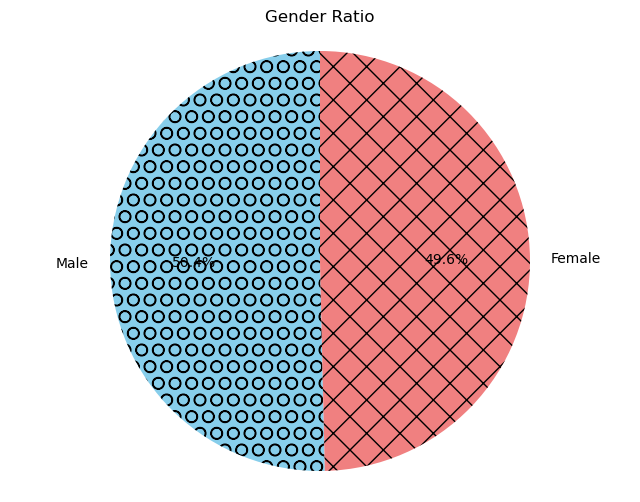

In [74]:
# Count the number of males and females
# Plot the pie chart
plt.figure(figsize=(8, 6))
plt.pie(df['Gender'].value_counts(), labels=['Male', 'Female'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'], hatch=['O', 'X'],)
plt.title('Gender Ratio')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Text(0, 0.5, 'Count')

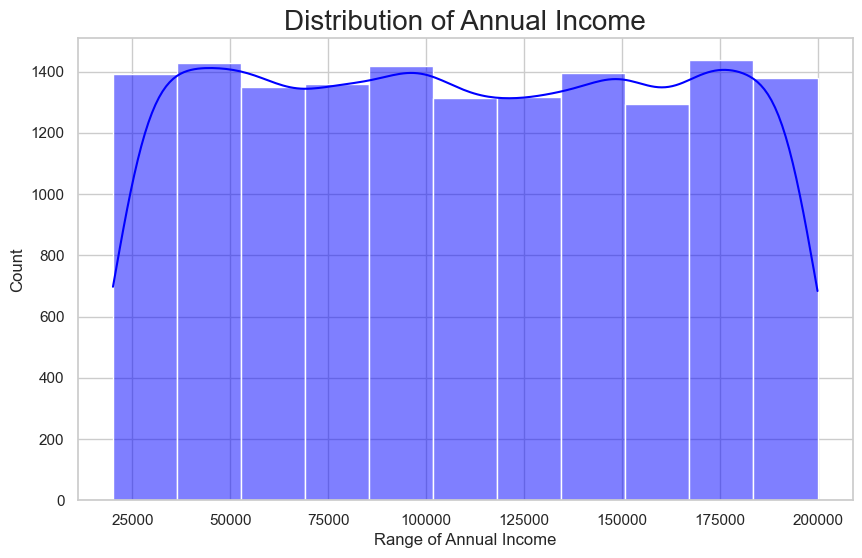

In [184]:
#Distribution of Annnual Income
plt.figure(figsize=(10, 6))

sns.histplot(df['Annual Income'], kde=True, color='blue', element='bars', bins=11)
plt.title('Distribution of Annual Income', fontsize = 20)
plt.xlabel('Range of Annual Income')
plt.ylabel('Count')

## Preprocessing

In [87]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
Train, Test = train_test_split(df, test_size=0.2, random_state=42)


scaler = StandardScaler()
Train = scaler.fit_transform(Train)
Train = pca.fit_transform(Train)
# Test = scaler.transform(Test)


Train.shape

(12063, 2)

## K-means Clustering Model


In [88]:
def euclidean_distance(x1, x2):
    """Randomly initialize k centroids from the data points."""
    return np.sqrt(np.sum((x1 - x2) ** 2))

def initialize_centroids(data, k):
    """Randomly initialize k centroids from the data points."""
    indicies = np.random.choice(data.shape[0], k, replace=False)
    return data[indicies]

def assign_clusters(data, centroids):
    """Assign each data point to the closest centroid."""
    clusters = []
    for point in data:
        distances = [euclidean_distance(point, centroid) for centroid in centroids]
        cluster = np.argmin(distances)
        clusters.append(cluster)
    return np.array(clusters)

def update_centroids(data, clusters, k):
    """Recompute centroids as the mean of all points assigned to each cluster."""
    centroids = []
    for i in range(k):
        cluster_points = data[clusters == i]
        if len(cluster_points) > 0:
            centroids.append(np.mean(cluster_points, axis=0))
        else:
            # Handle empty cluster
            centroids.append(data[np.random.randint(0, data.shape[0])])
    return np.array(centroids)

def k_means(data, k, max_iterations=100, tolerance=1e-4):
    """Perform K-Means clustering."""
    centroids = initialize_centroids(data, k)
    for _ in range(max_iterations):
        clusters = assign_clusters(data, centroids)
        new_centroids = update_centroids(data, clusters, k)
        # Check for convergence
        if np.all(np.abs(new_centroids - centroids) < tolerance):
            break
        centroids = new_centroids
    return centroids, clusters

## Elbow Method

Completed k=1
Completed k=2
Completed k=3
Completed k=4
Completed k=5
Completed k=6
Completed k=7
Completed k=8
Completed k=9
Completed k=10


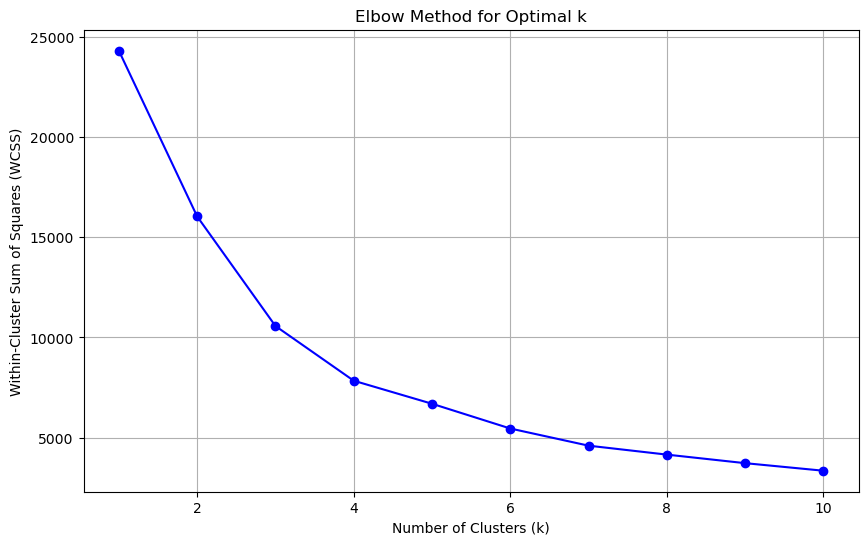

In [102]:
def calculate_wcss(data, centroids, clusters):
    """Calculate within-cluster sum of squares"""
    wcss = 0
    for i in range(len(centroids)):
        cluster_points = data[clusters == i]
        if len(cluster_points) > 0:
            cluster_center = centroids[i]
            # Calculate squared distances from points to centroid
            squared_distances = np.sum((cluster_points - cluster_center) ** 2, axis=1)
            wcss += np.sum(squared_distances)
    return wcss

def elbow_method(data, k_range):
    """Implement elbow method for optimal k"""
    wcss_values = []
    
    for k in k_range:
        # Run k-means
        centroids, clusters = k_means(data, k)
        # Calculate WCSS
        wcss = calculate_wcss(data, centroids, clusters)
        wcss_values.append(wcss)
        print(f"Completed k={k}")
    
    return wcss_values

# Run elbow method for k values from 1 to 10
k_range = range(1, 11)
wcss_values = elbow_method(Train, k_range)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, wcss_values, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()


## Running K-means Clustering

C:\Users\Infinity\AppData\Local\Temp\ipykernel_3460\3573178736.py:8: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(centroids[:, 0], centroids[:, 1], color='black', edgecolors='black', marker='x', label='Centroids')


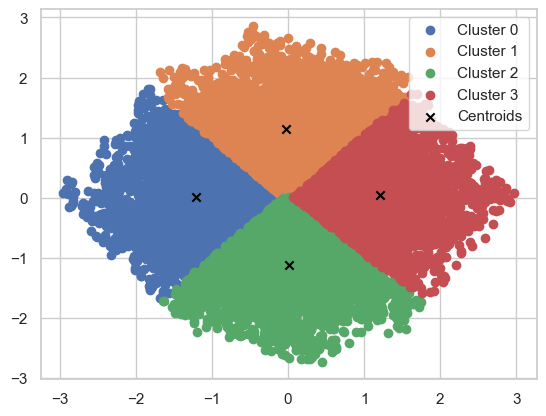

In [185]:
k = 4 # Number of clusters
centroids, clusters = k_means(Train, k)

# Plot the results
for i in range(k):
    cluster_points = Train[clusters == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i}')
plt.scatter(centroids[:, 0], centroids[:, 1], color='black', edgecolors='black', marker='x', label='Centroids')
plt.legend()
plt.show()

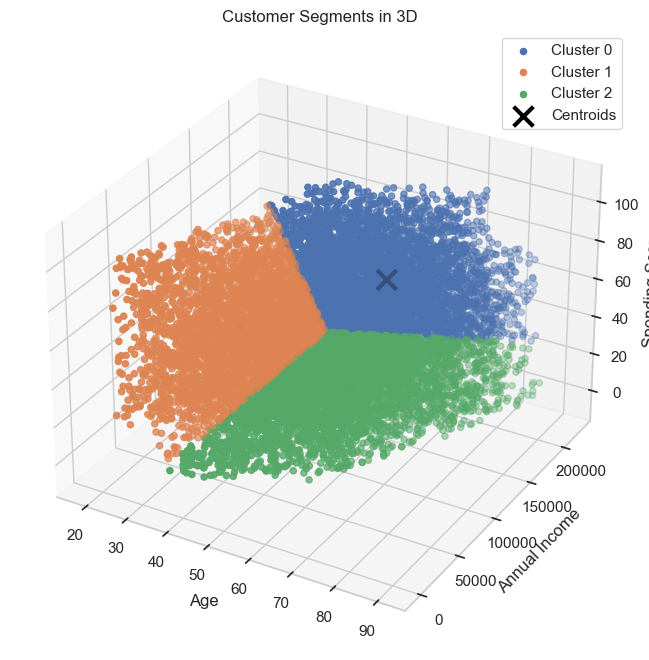

In [164]:


# After your k-means clustering, add this code:

# Create a 3D scatter plot
fig = plt.figure(figsize=(8, 12))
ax = fig.add_subplot(111, projection='3d')

# Get the original data back from scaled values
original_data = scaler.inverse_transform(pca.inverse_transform(Train))

# Plot each cluster
for i in range(k):
    cluster_points = original_data[clusters == i]
    ax.scatter(cluster_points[:, 0],  # Age
              cluster_points[:, 2],   # Annual Income
              cluster_points[:, 3],   # Spending Score
              label=f'Cluster {i}')

# Plot centroids
centroid_points = scaler.inverse_transform(pca.inverse_transform(centroids))
ax.scatter(centroid_points[:, 0], 
          centroid_points[:, 2], 
          centroid_points[:, 3], 
          c='black', 
          marker='x', 
          s=200, 
          linewidth=3, 
          label='Centroids')

# Set labels and title
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Spending Score')
ax.set_title('Customer Segments in 3D')

# Add legend
plt.legend()

# Show the plot
plt.show()

# Optional: Add ability to rotate the plot
plt.show(block=True)

In [91]:
print("PCA components:")
print(pca.components_)
print("\nVariance explained by each component:")
print(pca.explained_variance_ratio_)

PCA components:
[[-0.58217597 -0.47202224 -0.47751103  0.45852957]
 [ 0.21918614 -0.28013166  0.65234947  0.66927113]]

Variance explained by each component:
[0.25273678 0.25086833]


## Implementation using sklearn

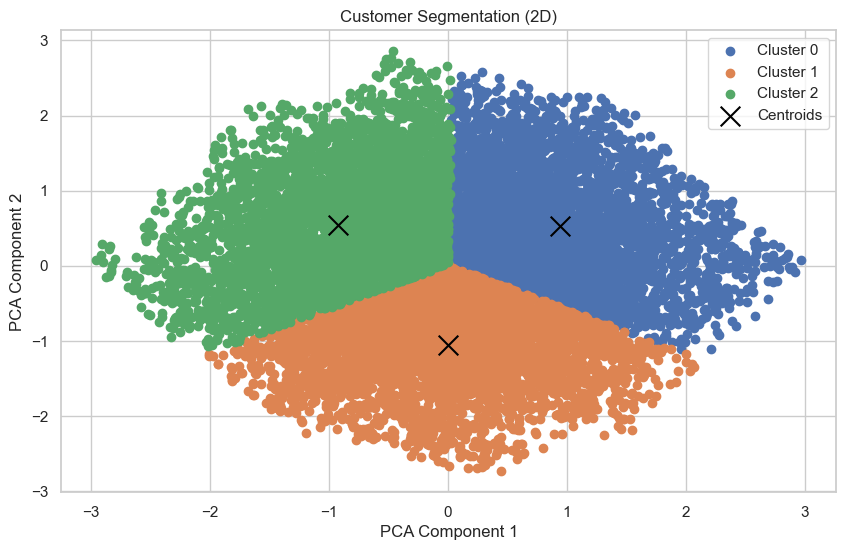

In [173]:
from sklearn.cluster import KMeans
# Apply KMeans with k=3
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans.fit(Train)

# Get cluster labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

plt.figure(figsize=(10, 6))

# Plot clusters
for i in range(optimal_k):
    cluster_points = Train[labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i}')

# Plot centroids
plt.scatter(centroids[:, 0], centroids[:, 1], color='black', marker='x', s=200, label='Centroids')

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Customer Segmentation (2D)')
plt.legend()
plt.show()



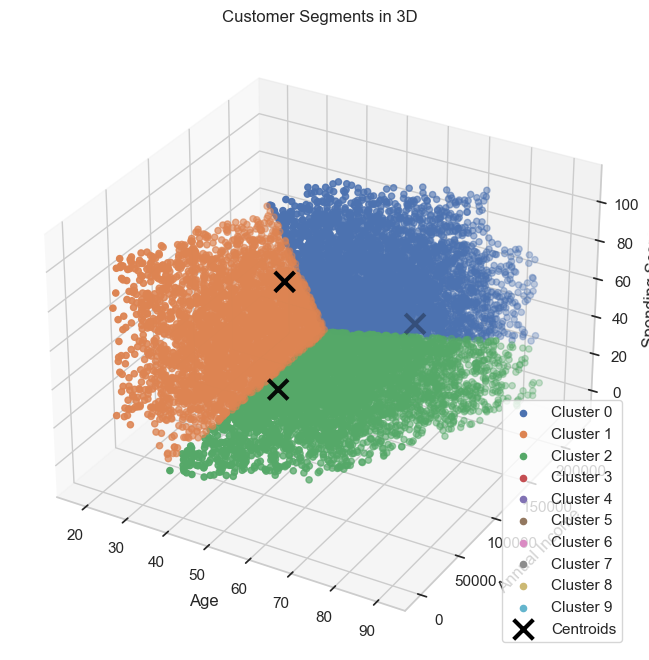

In [178]:

# After your k-means clustering, add this code:

# Create a 3D scatter plot
fig = plt.figure(figsize=(8, 12))
ax = fig.add_subplot(111, projection='3d')

# Get the original data back from scaled values
original_data = scaler.inverse_transform(pca.inverse_transform(Train))

# Plot each cluster
for i in range(k):
    cluster_points = original_data[clusters == i]
    ax.scatter(cluster_points[:, 0],  # Age
              cluster_points[:, 2],   # Annual Income
              cluster_points[:, 3],   # Spending Score
              label=f'Cluster {i}')

# Plot centroids
centroid_points = scaler.inverse_transform(pca.inverse_transform(centroids))
ax.scatter(centroid_points[:, 0], 
          centroid_points[:, 2], 
          centroid_points[:, 3], 
          c='black', 
          marker='x', 
          s=200, 
          linewidth=3, 
          label='Centroids')

# Set labels and title
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Spending Score')
ax.set_title('Customer Segments in 3D')

# Add legend
plt.legend()

# Show the plot
plt.show()

# Optional: Add ability to rotate the plot
plt.show(block=True)